In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv), data manipulation as in SQL
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # plot library of python
%matplotlib inline
from sklearn.linear_model import LogisticRegression # to apply the Logistic regression
from sklearn.model_selection import train_test_split # to split the data into two partsas
from sklearn.model_selection import GridSearchCV# for tuning parameter
from sklearn.ensemble import RandomForestClassifier # for random forest classifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics # to check the error and accuracy of the model
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
import plotly.figure_factory as ff
import plotly.offline as py

In [2]:
data_df= pd.read_csv("../input/data.csv")

In [3]:
data_df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
data_df.shape

(569, 33)

In [5]:
data_df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

     It's good idea to drop Unnamed: 32 Column

In [6]:
data_df.drop(['Unnamed: 32'],axis = 1,inplace = True)

In [7]:
data_df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [8]:
data_df[['diagnosis','radius_worst','radius_mean','radius_se']].groupby('diagnosis').mean()

,radius_worst,radius_mean,radius_se
diagnosis,,,
B,13.379801,12.146524,0.284082
M,21.134811,17.462830,0.609083


We can observe that on an average of radius in all scenarios is less in Benign Tumor as compared to Malignant one.

In [9]:
M = data_df[(data_df['diagnosis'] == 'M')]
B = data_df[(data_df['diagnosis'] == 'B')]

In [10]:
def myplot(data_new,bin_size):
    tmp1 = M[data_new]
    tmp2 = B[data_new]
    hist_data = [tmp1, tmp2]
    group_labels = ["Malignant","Benign"]
    colors = ['#F24027', '#2CD166']
    fig  = ff.create_distplot(hist_data,group_labels,colors = colors, show_hist = True, bin_size = bin_size,curve_type = 'kde')
    fig['layout'].update(title = data_new)
    py.iplot(fig, filename = 'Density Plot')

In [11]:
myplot('radius_mean',.5)
myplot('texture_mean',.5)
myplot('compactness_mean' , 0.005)

Segregating the features

In [12]:
features_mean = data_df.columns[2:11]
features_mean

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean'],
      dtype='object')

In [13]:
features_se = data_df.columns[12:22]
features_se

Index(['radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se'],
      dtype='object')

In [14]:
features_worst = data_df.columns[23:]
features_worst

Index(['texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [15]:
data_df['diagnosis'] = data_df['diagnosis'].map({'M':1,'B':0})

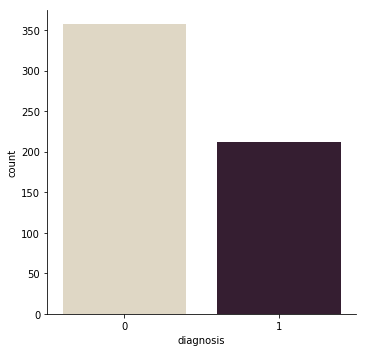

In [16]:
sns.catplot(x="diagnosis", kind="count", palette="ch:.30", data=data_df)

In [17]:
corr_mean = data_df[features_mean].corr()

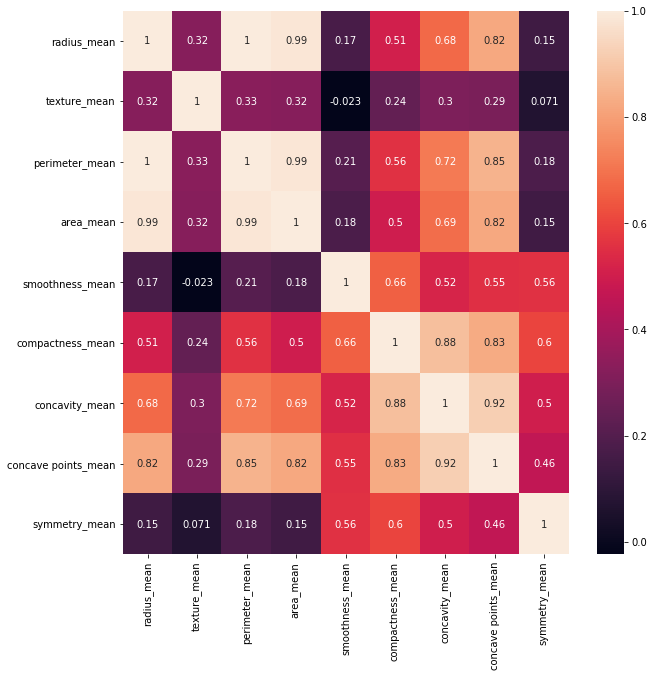

In [18]:
plt.figure(figsize= (10,10))
sns.heatmap(corr_mean,annot = True)

> ****Highly Correalted Pairs:
>     (radius_mean <-> area_mean)
>     (perimeter_mean <-> area_mean)
>     (concavity_mean <-> concave points_mean)

In [19]:
corr_mean.abs()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741
texture_mean,0.323782,1.000000,0.329533,0.321086,0.023389,0.236702,0.302418,0.293464,0.071401
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293
smoothness_mean,0.170581,0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667
concave points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000


In [20]:
select_pred_mean = ['radius_mean','texture_mean','smoothness_mean','compactness_mean','symmetry_mean']

> Modelling

In [21]:
train , test = train_test_split(data_df,test_size = 0.2)
print(train.shape)
print(test.shape)

(455, 32)
(114, 32)


In [22]:
train_X = train[select_pred_mean]# taking the training data input 
train_y=train.diagnosis
test_X= test[select_pred_mean] # taking test data inputs
test_y =test.diagnosis   #output value of test data
model_rf=RandomForestClassifier(n_estimators=100)
model_rf.fit(train_X,train_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [23]:
predict_value = model_rf.predict(test_X)

In [24]:
predict_value

array([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1])

In [25]:
metrics.accuracy_score(predict_value,test_y)

0.8859649122807017

In [26]:
model_logreg = LogisticRegression()
model_logreg.fit(train_X,train_y)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [27]:
predict_logreg = model_logreg.predict(test_X)
metrics.accuracy_score(predict_logreg,test_y)

0.8508771929824561

In [28]:
metrics.f1_score(predict_logreg,test_y)

0.7951807228915663

In [29]:
metrics.confusion_matrix(predict_logreg,test_y)

array([[64, 17],
       [ 0, 33]])

In [30]:
metrics.confusion_matrix(predict_value,test_y)

array([[61, 10],
       [ 3, 40]])

In [31]:
metrics.f1_score(predict_value,test_y)

0.8602150537634408

ROC Curves
tells how much model is capable of distinguishing between classes.  

In [32]:
def roc_curve(model_num,name_model):
    probs = model_num.predict_proba(test_X)
    preds = probs[:,1] # tpr
    fpr, tpr, threshold = metrics.roc_curve(test_y, preds)
    roc_auc = metrics.auc(fpr, tpr)
    plt.title('Receiver Operating Characteristic for ' + name_model)
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

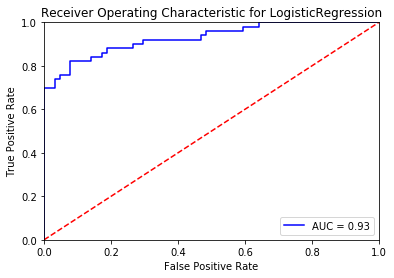

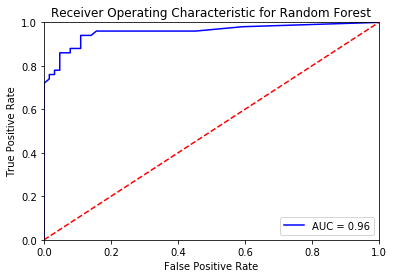

In [33]:
roc_curve(model_logreg,"LogisticRegression")
roc_curve(model_rf,"Random Forest")

In [34]:
#Checking with taking all features
select_pred_mean_full = features_mean
train_X= train[select_pred_mean_full]
train_y= train.diagnosis
test_X = test[select_pred_mean_full]
test_y = test.diagnosis

In [35]:
#Default Random Forest Classifier Algorithm without any tuning
model=RandomForestClassifier(n_estimators=100)
model.fit(train_X,train_y)
prediction = model.predict(test_X)
metrics.accuracy_score(prediction,test_y)

0.9122807017543859

Accuracy Increases a Bit by including all mean features but not by a significant margin. So we keep the model complexity low.

In [36]:
#Calculating Feature Importance
featimp = pd.Series(model.feature_importances_, index=select_pred_mean_full).sort_values(ascending=False)
print(featimp)

concave points_mean    0.266709
perimeter_mean         0.178231
radius_mean            0.166292
concavity_mean         0.122199
area_mean              0.121341
texture_mean           0.073154
compactness_mean       0.033994
smoothness_mean        0.022559
symmetry_mean          0.015522
dtype: float64


In [37]:
#Using Xgboost
from xgboost import XGBRegressor
model_xgb = XGBRegressor()
# We can Add silent=True to avoid printing out updates with each cycle
model_xgb.fit(train_X, train_y, verbose=False)

[09:26:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/conda/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version

/opt/conda/lib/python3.6/site-packages/xgboost/core.py:588: FutureWarning:

Series.base is deprecated and will be removed in a future version



XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [38]:
y_pred = model_xgb.predict(test_X)

Calculating Accuracy 

In [39]:
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = metrics.accuracy_score(predictions,test_y)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 92.11%


https://stackoverflow.com/questions/36063014/what-does-kfold-in-python-exactly-do

In [40]:
kfold = StratifiedKFold(n_splits=10)

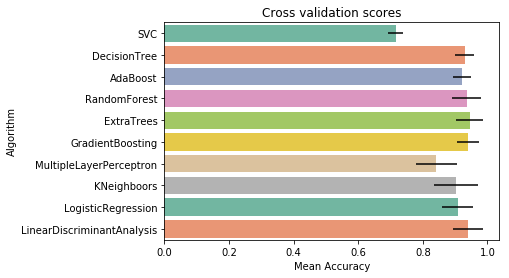

In [41]:
random_state = 2
classifiers = []
classifiers.append(SVC(random_state=random_state))
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(ExtraTreesClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(MLPClassifier(random_state=random_state))
classifiers.append(KNeighborsClassifier())
classifiers.append(LogisticRegression(random_state = random_state))
classifiers.append(LinearDiscriminantAnalysis())

cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, train_X, y = train_y, scoring = "accuracy", cv = kfold, n_jobs=4))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["SVC","DecisionTree","AdaBoost",
"RandomForest","ExtraTrees","GradientBoosting","MultipleLayerPerceptron","KNeighboors","LogisticRegression","LinearDiscriminantAnalysis"]})

g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set2",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")

Decision Tree
Random Forest
ET
GB

In [42]:
### META MODELING  WITH ADABOOST, RF, EXTRATREES and GRADIENTBOOSTING

# Adaboost
DTC = DecisionTreeClassifier()

adaDTC = AdaBoostClassifier(DTC, random_state=7)

ada_param_grid = {"base_estimator__criterion" : ["gini", "entropy"],
              "base_estimator__splitter" :   ["best", "random"],
              "algorithm" : ["SAMME","SAMME.R"],
              "n_estimators" :[1,2],
              "learning_rate":  [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3,1.5]}

gsadaDTC = GridSearchCV(adaDTC,param_grid = ada_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsadaDTC.fit(train_X,train_y)
pp = gsadaDTC.predict(test_X)

gsadaDTC_Acc = metrics.accuracy_score(pp,test_y)

print(gsadaDTC_Acc)

ada_best = gsadaDTC.best_estimator_

Fitting 10 folds for each of 112 candidates, totalling 1120 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done 688 tasks      | elapsed:    2.0s


0.9298245614035088


[Parallel(n_jobs=4)]: Done 1120 out of 1120 | elapsed:    3.2s finished
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning:

The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.



In [43]:
gsadaDTC.best_score_

0.9318681318681319

https://datascience.stackexchange.com/questions/21877/how-to-use-the-output-of-gridsearch

In [44]:
#ExtraTrees 
ExtC = ExtraTreesClassifier()
## Search grid for optimal parameters
ex_param_grid = {"max_depth": [None],
              "max_features": [1, 3, 9],
              "min_samples_split": [2, 3, 9],
              "min_samples_leaf": [1, 3, 9],
              "bootstrap": [False],
              "n_estimators" :[100,300],
              "criterion": ["gini"]}


gsExtC = GridSearchCV(ExtC,param_grid = ex_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsExtC.fit(train_X,train_y)

ExtC_best = gsExtC.best_estimator_

# Best score
gsExtC.best_score_

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 54 candidates, totalling 540 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    4.2s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   18.2s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:   44.2s
[Parallel(n_jobs=4)]: Done 540 out of 540 | elapsed:   54.8s finished
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning:

The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.



0.9516483516483516

In [45]:
# RFC Parameters tunning 
RFC = RandomForestClassifier()
## Search grid for optimal parameters
rf_param_grid = {"max_depth": [None],
              "max_features": [1, 3, 9],
              "min_samples_split": [2, 3, 9],
              "min_samples_leaf": [1, 3, 9],
              "bootstrap": [False],
              "n_estimators" :[100,300],
              "criterion": ["gini"]}


gsRFC = GridSearchCV(RFC,param_grid = rf_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsRFC.fit(train_X,train_y)

RFC_best = gsRFC.best_estimator_

# Best score
gsRFC.best_score_

Fitting 10 folds for each of 54 candidates, totalling 540 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    4.8s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   21.6s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:  1.0min
[Parallel(n_jobs=4)]: Done 540 out of 540 | elapsed:  1.3min finished
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning:

The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.



0.9472527472527472

In [46]:
# Gradient boosting tunning
GBC = GradientBoostingClassifier()
gb_param_grid = {'loss' : ["deviance"],
              'n_estimators' : [100,200,300],
              'learning_rate': [0.1, 0.05, 0.01],
              'max_depth': [4, 8],
              'min_samples_leaf': [100,150],
              'max_features': [0.3, 0.1] 
              }

gsGBC = GridSearchCV(GBC,param_grid = gb_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsGBC.fit(train_X,train_y)

GBC_best = gsGBC.best_estimator_
# Best score
gsGBC.best_score_

Fitting 10 folds for each of 72 candidates, totalling 720 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done 144 tasks      | elapsed:    5.4s
[Parallel(n_jobs=4)]: Done 720 out of 720 | elapsed:   25.4s finished
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning:

The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.



0.9560439560439561

https://medium.com/all-things-ai/in-depth-parameter-tuning-for-gradient-boosting-3363992e9bae

In [47]:
#Checking HyperParameter Values
RFC_best

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
                       max_depth=None, max_features=1, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

https://medium.com/@srnghn/the-mathematics-of-decision-trees-random-forest-and-feature-importance-in-scikit-learn-and-spark-f2861df67e3

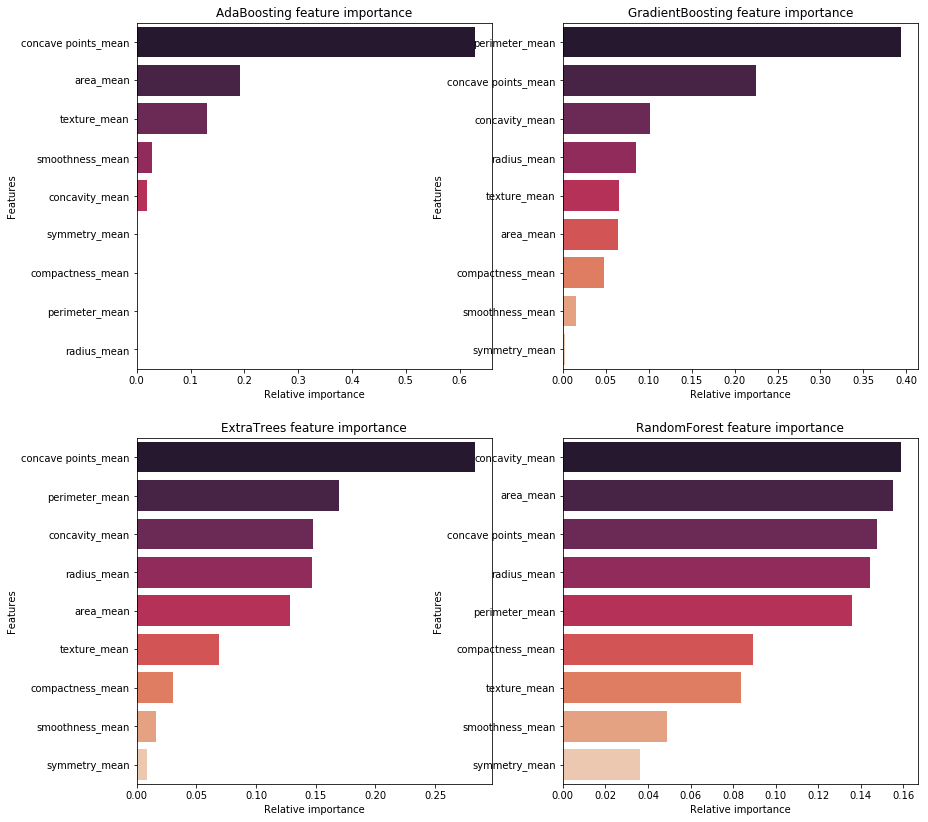

In [48]:
rows = cols = 2
fig, axes = plt.subplots(rows , cols ,figsize=(14,14))

best_classifiers = [("AdaBoosting", ada_best),("GradientBoosting",GBC_best),("ExtraTrees",ExtC_best),("RandomForest",RFC_best)]

nclassifier = 0
for row in range(rows):
    for col in range(cols):
        name = best_classifiers[nclassifier][0]
        classifier = best_classifiers[nclassifier][1]
        indices = np.argsort(classifier.feature_importances_)[::-1][:9]
        g = sns.barplot(y=train_X.columns[indices][:9],x = classifier.feature_importances_[indices][:9] ,
                        orient='h',ax=axes[row][col],palette="rocket")
        g.set_xlabel("Relative importance",fontsize=10)
        g.set_ylabel("Features",fontsize=10)
        g.tick_params(labelsize=10)
        g.set_title(name + " feature importance")
        nclassifier += 1

** Ensembled Voting**

In [49]:
votingC = VotingClassifier(estimators=[('rfc', RFC_best), ('extc', ExtC_best),
('adac',ada_best),('gbc',GBC_best)], voting='soft', n_jobs=4)
votingC = votingC.fit(train_X,train_y)

Hard voting is where a model is selected from an ensemble to make the final prediction by a simple majority vote for accuracy.

Soft Voting can only be done when all your classifiers can calculate probabilities for the outcomes. Soft voting arrives at the best result by averaging out the probabilities calculated by individual algorithms.

https://towardsdatascience.com/ensemble-learning-in-machine-learning-getting-started-4ed85eb38e00****

In [50]:
pred_voting = votingC.predict(test_X)
metrics.accuracy_score(pred_voting,test_y)

0.9385964912280702

In [51]:
metrics.f1_score(pred_voting,test_y)

0.9263157894736842

In [52]:
pd.crosstab(pred_voting,test_y)

diagnosis,0,1
row_0,,
0,63,6
1,1,44


In [53]:
def roc_curve(model_num,name_model):
    probs = model_num.predict_proba(test_X)
    preds = probs[:,1] # True Positive Rate
    fpr, tpr, threshold = metrics.roc_curve(test_y, preds)
    roc_auc = metrics.auc(fpr, tpr)
    plt.title('Receiver Operating Characteristic for ' + name_model)
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

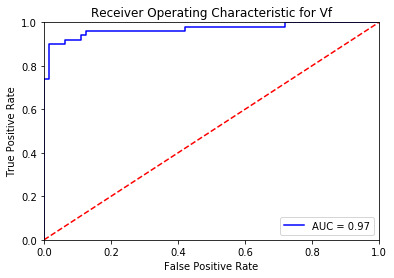

In [54]:
roc_curve(votingC,"Vf")

In [55]:
final_sub = pd.DataFrame({'Id': test.id, 'Ensembled_Diagnosis_Prediction': pred_voting})
final_sub.head()

,Id,Ensembled_Diagnosis_Prediction
387,902976,0
294,891716,0
433,908445,1
51,857373,0
11,84610002,1


Thanks for your time ! This is my first Kernel. Please let me know any suggestion for improvement.
Do Upvote if you liked the kernel it will motivate me. 

**Happy Learning ! **